#  <center> <span style="color:blue">  </span> <center> <center><span style="color:blue">Medical image enhancement based on histogram algorithms</span></center>

### <center>Réaliser par : Jihen Fennani  </center>

## 1. Introduction

D'après l'article <b>Medical image enhancement based on histogram algorithms </b> de Nema Salema, Hebatullah Malikb, Asmaa Shams, la radiologie est essentielle pour le diagnostic des maladies grâce à sa capacité à fournir des représentations visuelles de l'anatomie interne. <br>
L'article explore différentes branches de la radiologie, chacune servant un objectif précis et produisant des images avec des distributions d'intensité de pixels variées. Il met en lumière l'utilisation des rayons X principalement pour la détection osseuse et de l'IRM pour l'imagerie des organes, tissus mous, et autres structures internes.<br>
L'objectif de la recherche, tel qu'énoncé dans l'article, est de déterminer la technique d'amélioration du contraste la plus efficace pour les images médicales. En analysant quatre techniques spécifiques :  <b>  HE, CHE, CLAHE et QDHE  </b>  <br> 
L'article évalue leur efficacité sur des images médicales en se basant sur trois mesures : 
- le Rapport Signal sur Bruit de Crête (<b>PSNR</b>)
- l'Erreur Quadratique Moyenne (<b>MSE</b>)
- l'Écart Type (<b>SD</b>).

## 2. Image histogram processing

### 2.1. Generating histogram

In [8]:
!pip install opencv-python

In [9]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

Erreur : Impossible de charger l'image E:/RT4/S2/Traitement dimage/TP2\equalization.txt. Vérifiez le chemin et les permissions.
Erreur : Impossible de charger l'image E:/RT4/S2/Traitement dimage/TP2\qhe.txt. Vérifiez le chemin et les permissions.


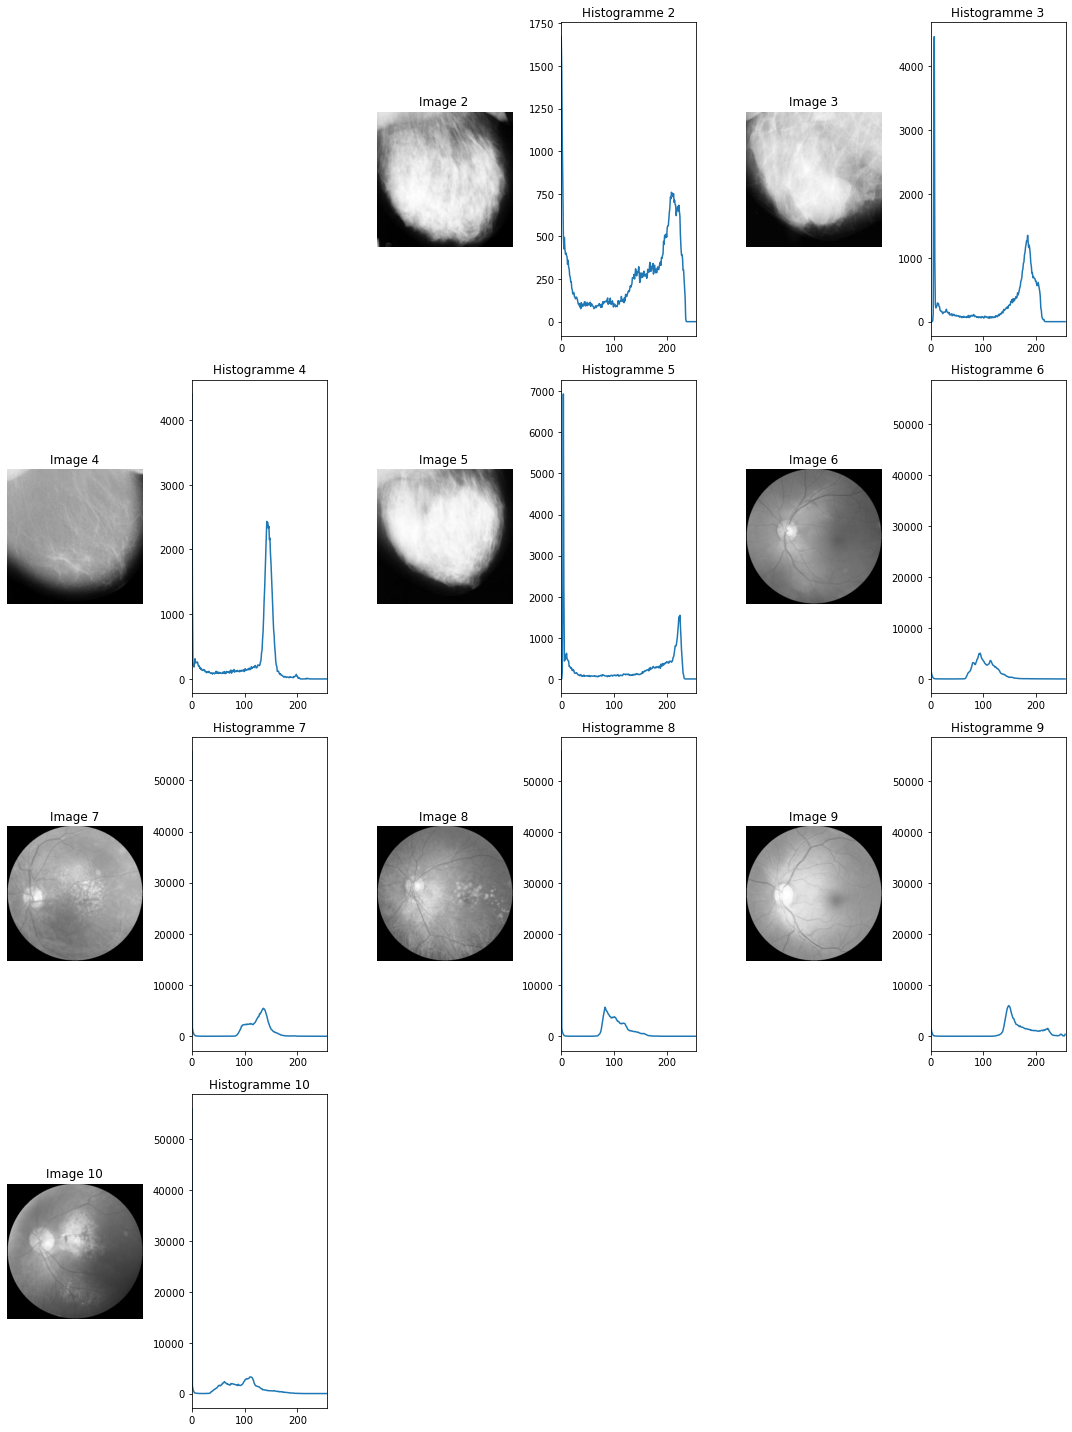

In [50]:

directory_path = 'E:/RT4/S2/Traitement dimage/TP2'

image_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# Calcul du nombre de lignes nécessaires pour 3 images par ligne
num_images = len(image_files)
rows = (num_images + 2) // 3  
plt.figure(figsize=(15, 5 * rows))

for i, image_file in enumerate(image_files):
    # Lisez l'image
    img_path = os.path.join(directory_path, image_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Erreur : Impossible de charger l'image {img_path}. Vérifiez le chemin et les permissions.")
        continue
    
    # Calcul de l'histogramme
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Affichage de l'image
    plt.subplot(rows, 6, (i * 2) + 1)  # Chaque image prend 2 colonnes sur 6 dans une rangée
    plt.imshow(image, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')

    # Affichage de l'histogramme
    plt.subplot(rows, 6, (i * 2) + 2)  # Histogramme à côté de l'image correspondante
    plt.plot(histogram)
    plt.title(f'Histogramme {i+1}')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()


## 3. Histogram equalization, HE

L'égalisation de l'histogramme (Histogram Equalization, HE) est une technique de traitement d'image qui est utilisée pour améliorer le contraste d'une image. 

Failed to load image at E:/RT4/S2/Traitement dimage/TP2\equalization.txt. Skipping...
Failed to load image at E:/RT4/S2/Traitement dimage/TP2\qhe.txt. Skipping...


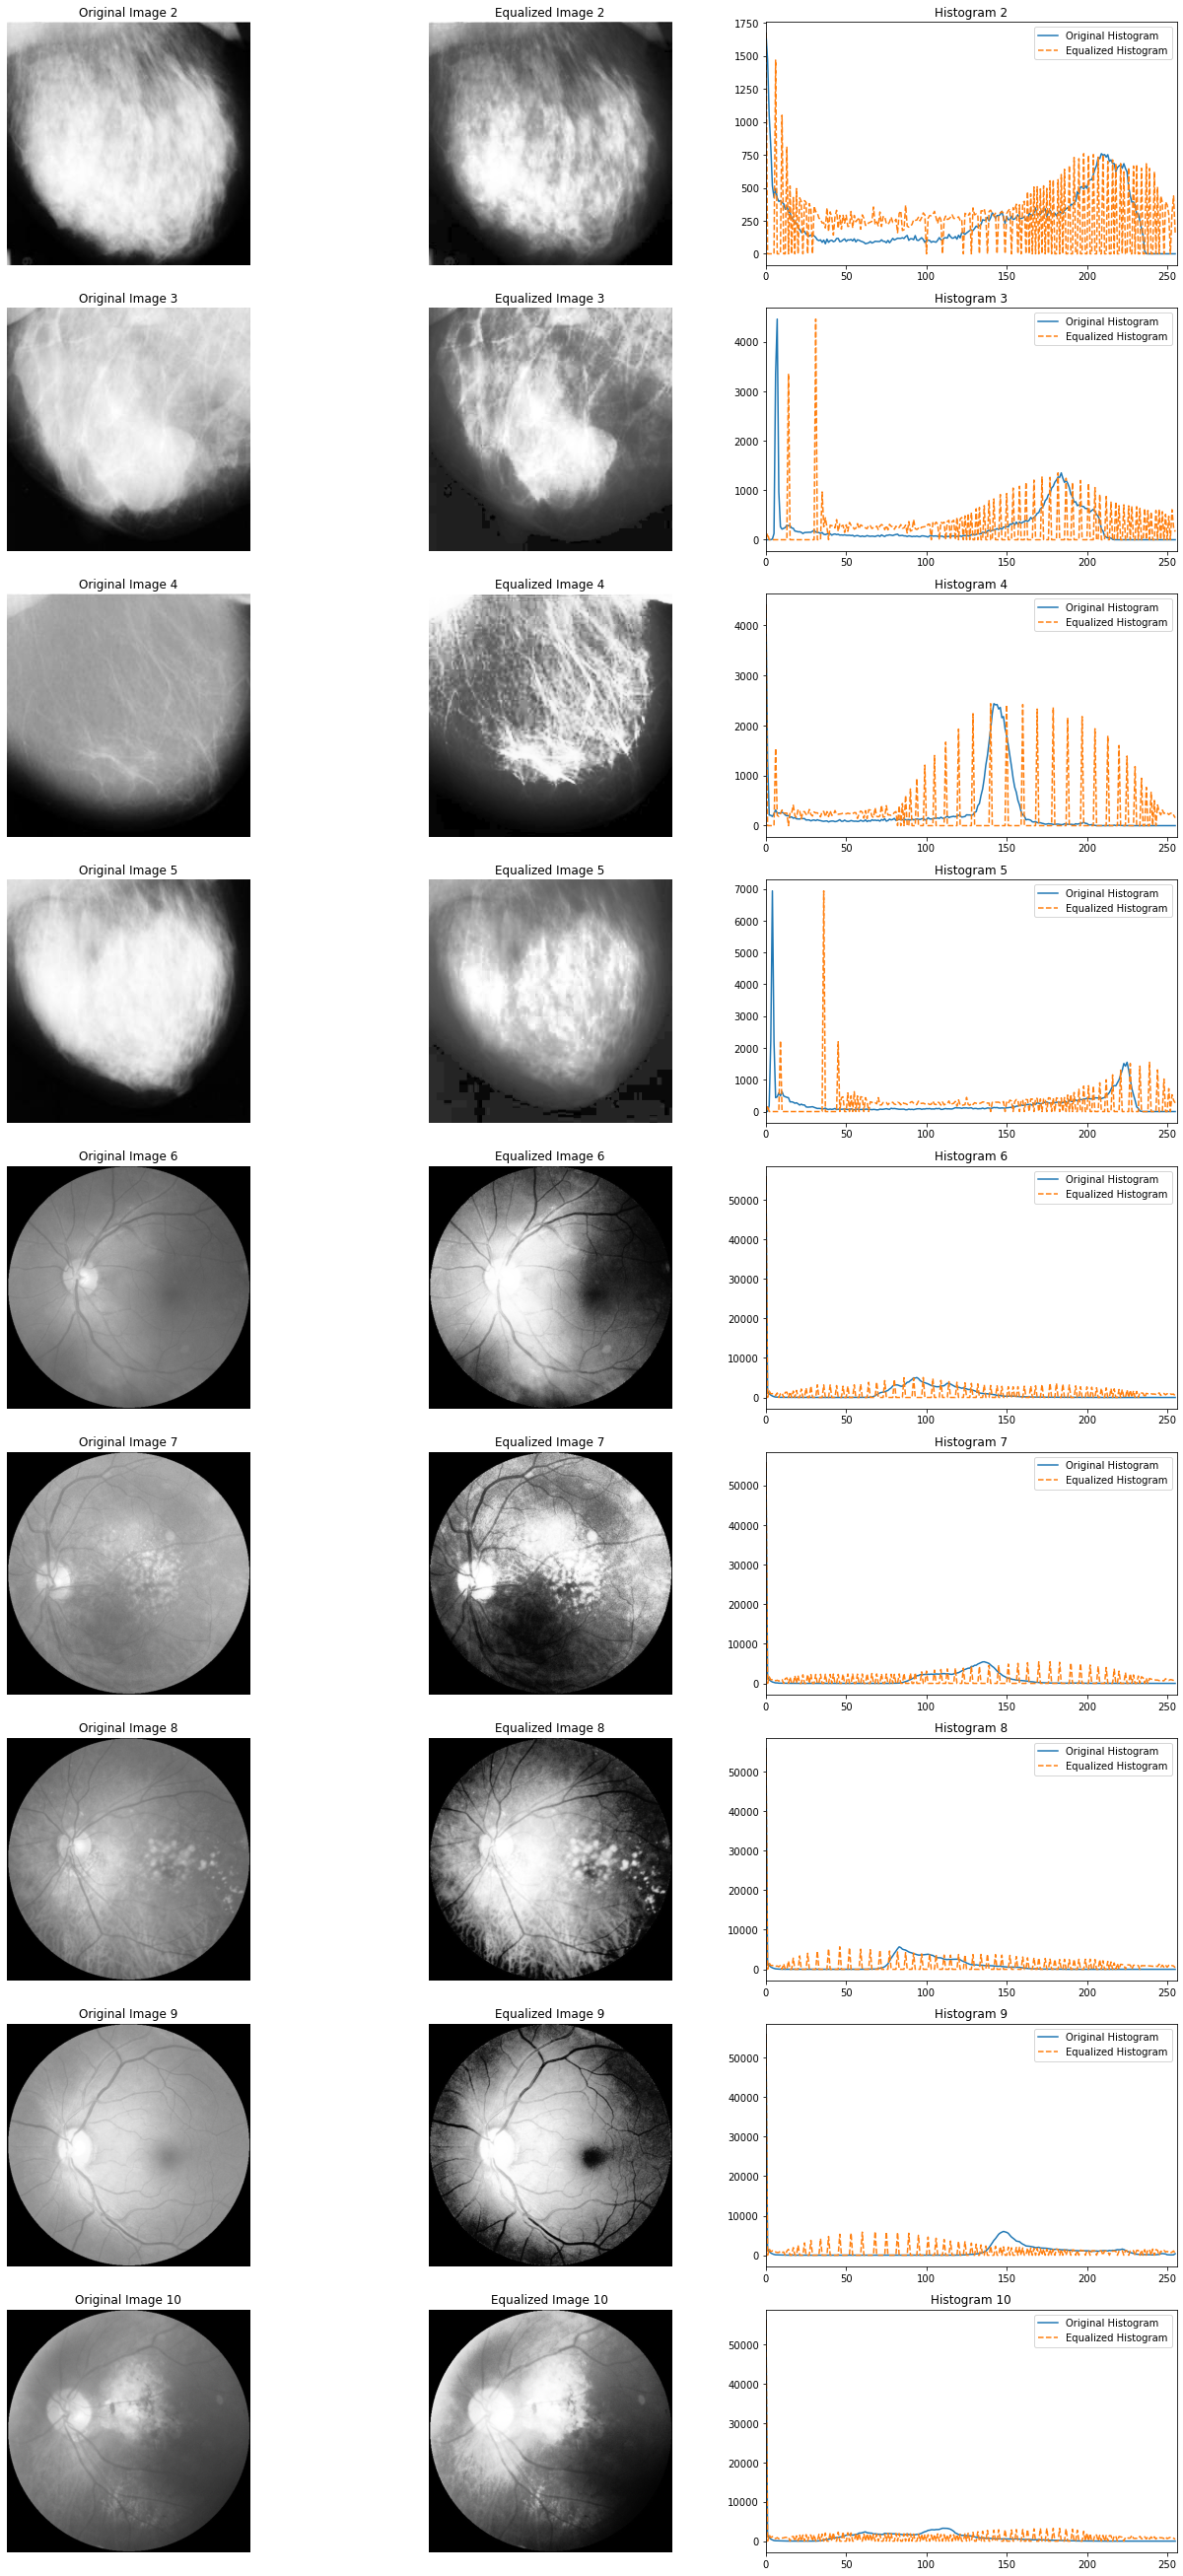

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


directory_path = 'E:/RT4/S2/Traitement dimage/TP2'

image_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

n_images = len(image_files)
rows = ((n_images * 3) + 2) // 3

plt.figure(figsize=(18, rows * 4))

for i, image_file in enumerate(image_files, start=1):
    img_path = os.path.join(directory_path, image_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Failed to load image at {img_path}. Skipping...")
        continue 
    
    equalized_image = cv2.equalizeHist(image)

    original_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    equalized_histogram = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

    base_index = (i - 1) * 3 

    # Affichage de l'image originale
    plt.subplot(rows, 3, base_index + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Original Image {i}')
    plt.axis('off')

    # Affichage de l'image égalisée
    plt.subplot(rows, 3, base_index + 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title(f'Equalized Image {i}')
    plt.axis('off')

    # Affichage des histogrammes superposés
    plt.subplot(rows, 3, base_index + 3)
    plt.plot(original_histogram, label='Original Histogram')
    plt.plot(equalized_histogram, label='Equalized Histogram', linestyle='--')
    plt.title(f'Histogram {i}')
    plt.xlim([0, 256])
    plt.legend()

plt.tight_layout()
plt.show()


## 4. Cumulative histogram equalization, CHE

In [23]:
# Fonction d'égalisation d'histogramme cumulatif (CHE)
def cumulative_histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    return cdf[image]

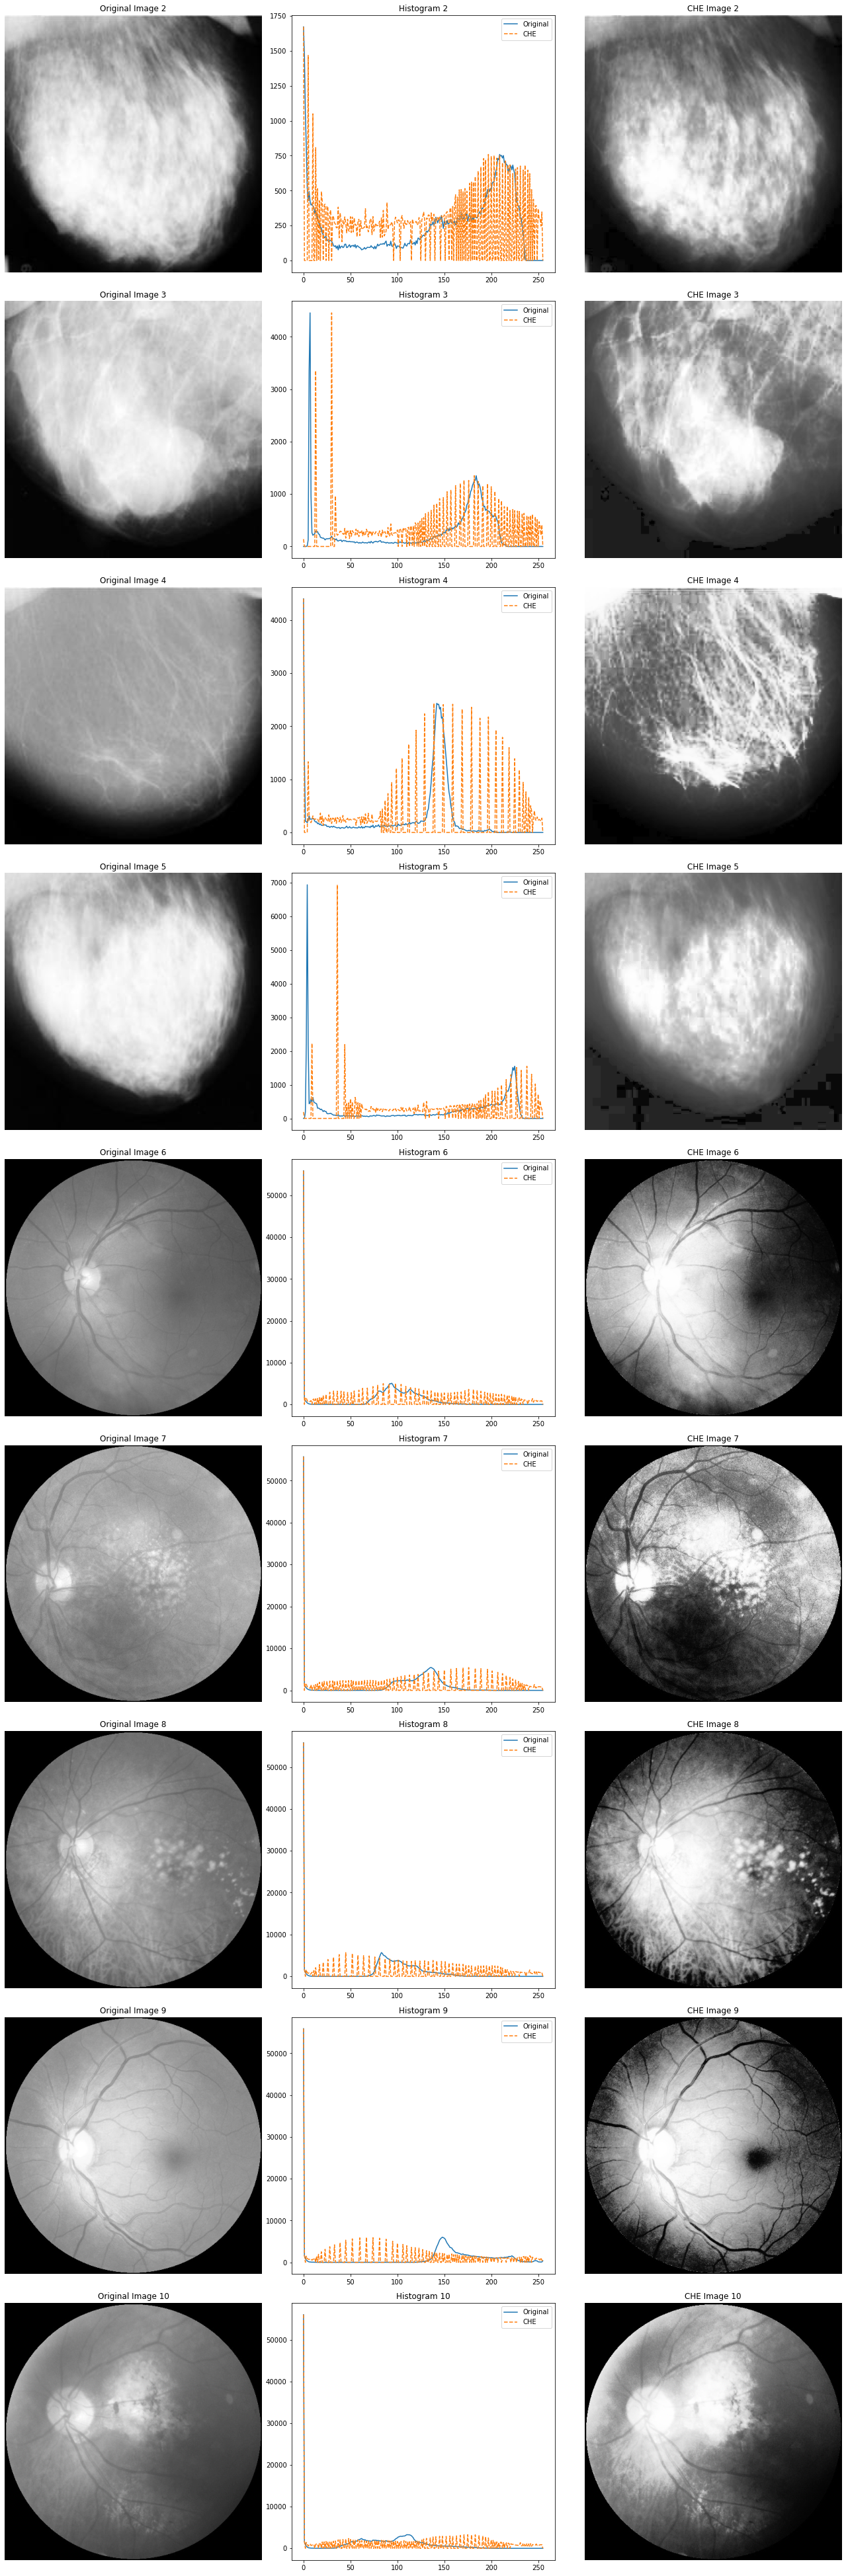

In [41]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

directory_path = 'E:/RT4/S2/Traitement dimage/TP2'

image_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

n_images = len(image_files)  
rows = n_images  
cols = 3  # Trois colonnes : image originale, histogramme combiné, image CHE

plt.figure(figsize=(18, rows * 6))

for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        equalized_image = cumulative_histogram_equalization(image)  # Applying CHE
        
        # Plot original image
        plt.subplot(rows, cols, i*cols + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {i+1}')
        plt.axis('off')
        
        # Calcul des histogrammes et affichage
        original_histogram, _ = np.histogram(image, bins=256, range=[0, 256])
        equalized_histogram, _ = np.histogram(equalized_image, bins=256, range=[0, 256])
        plt.subplot(rows, cols, i*cols + 2)
        plt.plot(original_histogram, label='Original')
        plt.plot(equalized_histogram, label='CHE', linestyle='--')
        plt.title(f'Histogram {i+1}')
        plt.legend()

        # Plot CHE image
        plt.subplot(rows, cols, i*cols + 3)
        plt.imshow(equalized_image, cmap='gray')
        plt.title(f'CHE Image {i+1}')
        plt.axis('off')

plt.tight_layout()
plt.show()


## 5. Quadratic dynamic histogram equalization, QDHE

### 5.1. Histogram partitioning

In [38]:
def calculate_histogram_partitions(image):
    height, width = image.shape
    total_pixels = width * height
    m1, m2, m3 = total_pixels * 0.25, total_pixels * 0.5, total_pixels * 0.75
    return int(m1), int(m2), int(m3)

### 5.2. Clipping

In [39]:

def clip_histogram(histogram, clip_limit):
    # Clip the histogram based on the clip_limit
    clipped_histogram = np.minimum(histogram, clip_limit)
    return clipped_histogram

### 5.3. New gray level range allocation

Allocation basée sur les partitions calculées et clipping
Cette étape nécessite une implémentation spécifique basée sur les formules données

In [40]:
def allocate_gray_level_ranges(histogram, m1, m2, m3):
    
    pass

### 5.4. Histogram equalization

In [41]:
def equalize_histogram_sub(histogram, bins):
    
    cdf = histogram.cumsum()
    cdf_normalized = cdf * float(len(bins) - 1) / cdf[-1]  # Utilisation de len(bins) pour obtenir le nombre de bins
    return np.round(cdf_normalized).astype('uint8')

- QDHE

In [42]:
def qdhe(image):
    histogram, bins = np.histogram(image.flatten(), 256, [0,256])
    m1, m2, m3 = calculate_histogram_partitions(image)
    clip_limit = np.mean(image)  
    clipped_histogram = clip_histogram(histogram, clip_limit)
    
    equalized_histogram = equalize_histogram_sub(clipped_histogram, bins)
        image_eq = equalized_histogram[image]
    
    return image_eq

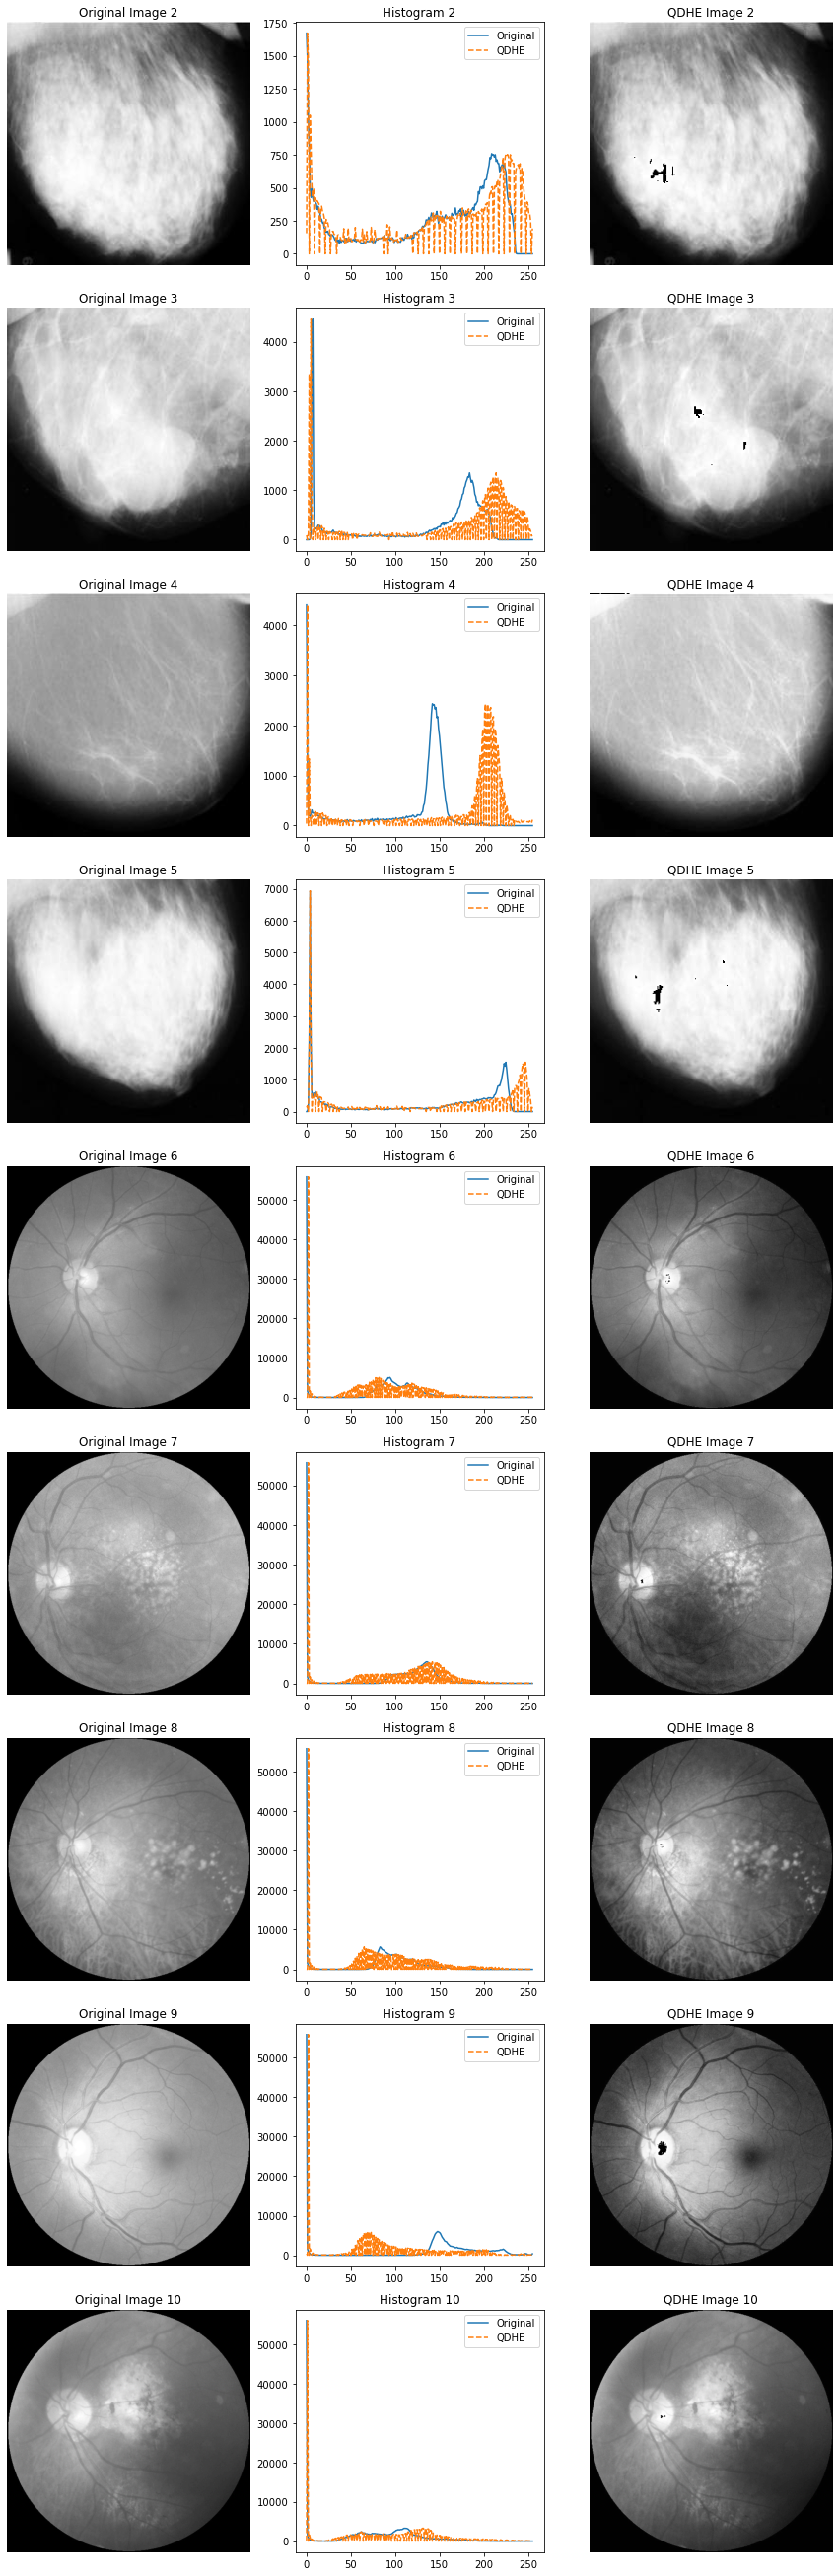

In [59]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


directory_path = 'E:/RT4/S2/Traitement dimage/TP2'
image_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
n_images = len(image_files) 
rows = n_images 
cols = 3  

plt.figure(figsize=(12, rows * 4))

for i, image_name in enumerate(image_files):
    image_path = os.path.join(directory_path, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
    if image is not None:
        equalized_image = qdhe(image)
        
        # Affichage de l'image originale
        plt.subplot(rows, cols, i * cols + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {i+1}')
        plt.axis('off')
        
        # Calcul et affichage des histogrammes
        original_histogram, _ = np.histogram(image, bins=256, range=[0, 256])
        equalized_histogram, _ = np.histogram(equalized_image, bins=256, range=[0, 256])
        plt.subplot(rows, cols, i * cols + 2)
        plt.plot(original_histogram, label='Original')
        plt.plot(equalized_histogram, label='QDHE', linestyle='--')
        plt.title(f'Histogram {i+1}')
        plt.legend()

        # Affichage de l'image après application de CHE
        plt.subplot(rows, cols, i * cols + 3)
        plt.imshow(equalized_image, cmap='gray')
        plt.title(f'QDHE Image {i+1}')
        plt.axis('off')

plt.tight_layout()
plt.show()

## 6. Contrast limited adaptive histogram equalization, CLAHE

- La technique Contrast Limited Adaptive Histogram Equalization (CLAHE) est une méthode d'égalisation d'histogramme avancée qui améliore le contraste des images en tenant compte de la distribution locale des intensités de pixels. CLAHE est particulièrement efficace pour les images médicales où la préservation des détails fins est cruciale. 

### 6.1. Clipping process based on a desired limit for contrast expansion

#### 6.1.1. First approach

In [1]:
# Function to calculate the new clip limit based on the first approach
def calculate_new_clip_limit(M, N, alpha, S_max):
    beta = M / N * (1 + alpha / 100 * (S_max - 1))
    return beta

#### 6.1.2. Second approach: binary search

In [2]:

# Function to perform binary search clipping based on the second approach
def binary_search_clipping(histogram, C):
    Bottom = 0
    Top = C
    while Top - Bottom > 1:
        Middle = (Top + Bottom) // 2
        Excess = sum(max(0, h - Middle) for h in histogram)
        if Excess + Middle > C:
            Top = Middle
        elif Excess + Middle < C:
            Bottom = Middle
        else:
            break
    return Bottom


In [30]:
# Applying CLAHE to an image with the computed clip limit
def apply_clahe(image, clip_limit, tile_grid_size):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(image)


Failed to load image file: equalization.txt
Failed to load image file: qhe.txt


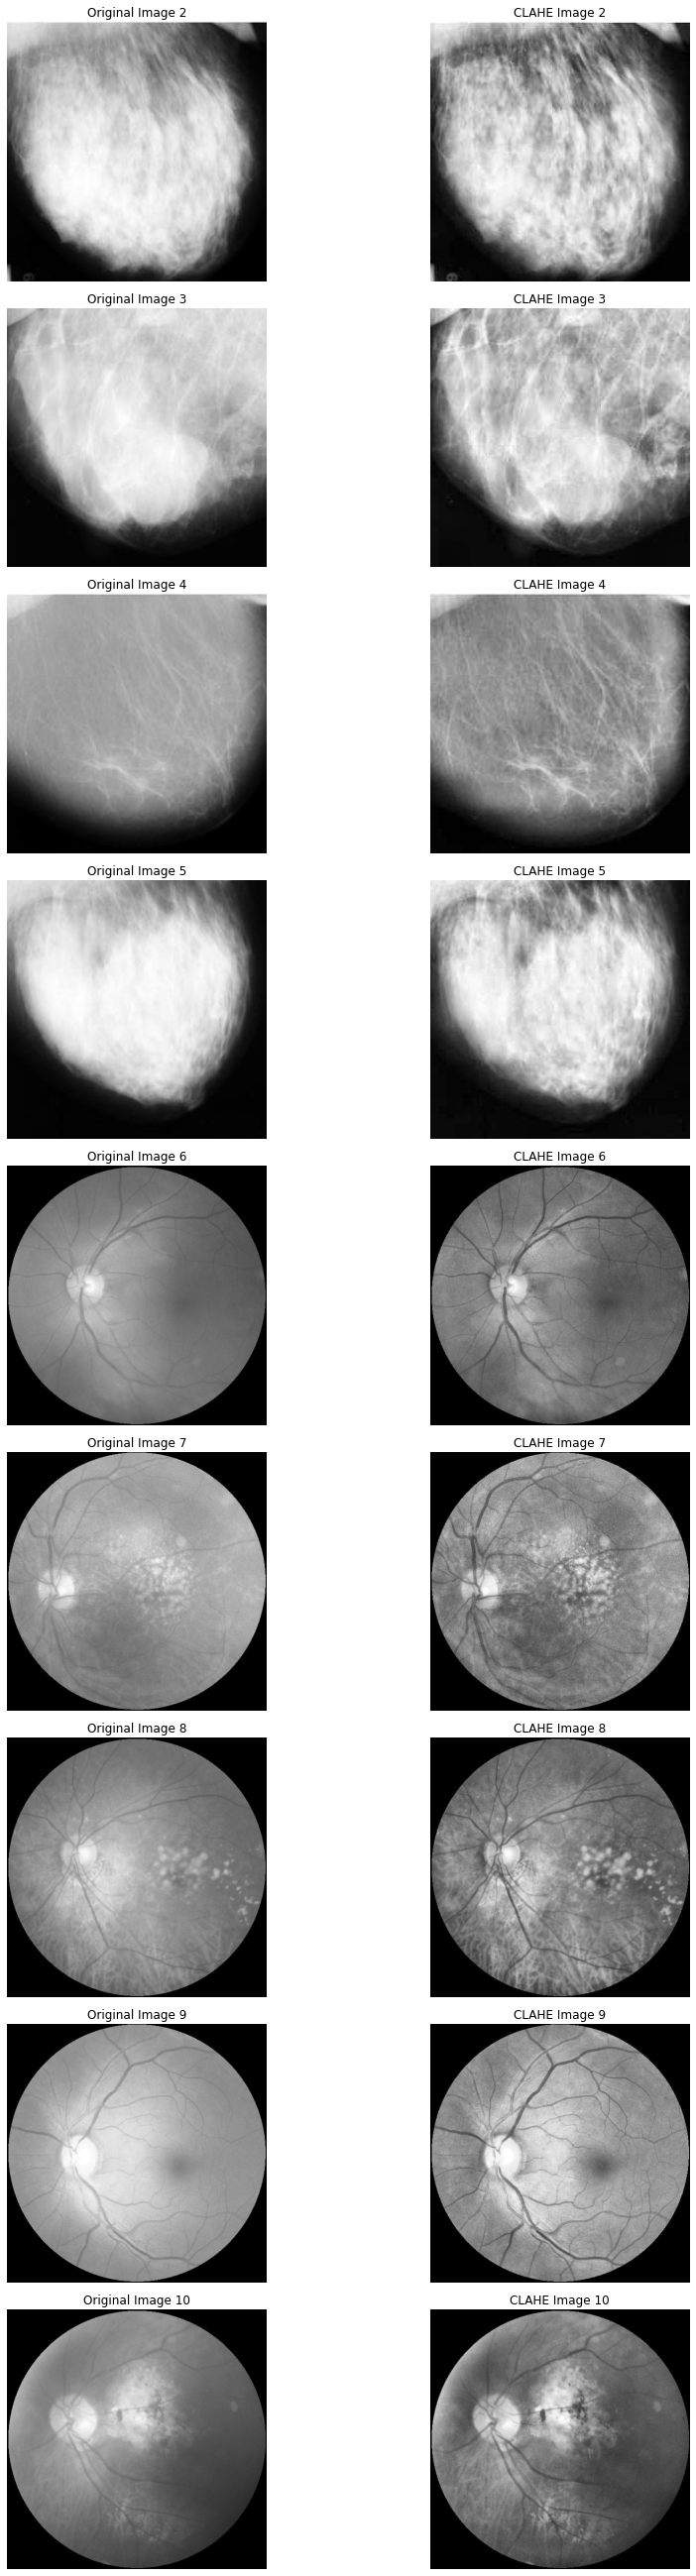

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# CLAHE parameters
clip_limit = 2.0  
tile_grid_size = (8, 8) 

directory_path = 'E:/RT4/S2/Traitement dimage/TP2'
image_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

rows = len(image_files) 
cols = 2  
plt.figure(figsize=(12, rows * 4))

for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Failed to load image file: {image_file}")
        continue
    
    equalized_image = apply_clahe(image, clip_limit, tile_grid_size)
    
    plt.subplot(rows, cols, i * cols + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.axis('off')
    
    # Affichage de l'image après application de CLAHE
    plt.subplot(rows, cols, i * cols + 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title(f'CLAHE Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### 6.2. Combination of the regions

#### 6.2.1. Regions in IR group

In [10]:
# Fonctions de mappage pour les régions IR, BR et CR
def map_pixel_IR(image, i, j, fi_minus1_j_minus1, fi_minus1_j, fi_j_minus1, s, r):
    p_old = image[i, j]
    p_new = s / r + s * ((fi_minus1_j_minus1 * p_old) + ((1 - fi_minus1_j_minus1) * fi_minus1_j * p_old)) + (r / (r + s)) * ((fi_j_minus1 * p_old) + ((1 - fi_j_minus1) * fi_j * p_old))
    return p_new

#### 6.2.2. Regions in BR group

In [11]:
def map_pixel_BR(image, i, j, fi_minus1_j, fi_j, s, r):
    p_old = image[i, j]
    p_new = (s / (r + s)) * (fi_minus1_j * p_old) + (r / (r + s)) * (fi_j * p_old)
    return p_new


#### 6.2.3. Regions in CR groups

In [12]:
def map_pixel_CR(image, i, j, fi_j, p_old):
    p_new = fi_j * p_old
    return p_new

In [29]:
# Fonction pour appliquer CLAHE à une image
def apply_clahe(image, clip_limit, tile_grid_size):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(image)


Impossible de charger l'image : equalization.txt
Impossible de charger l'image : qhe.txt


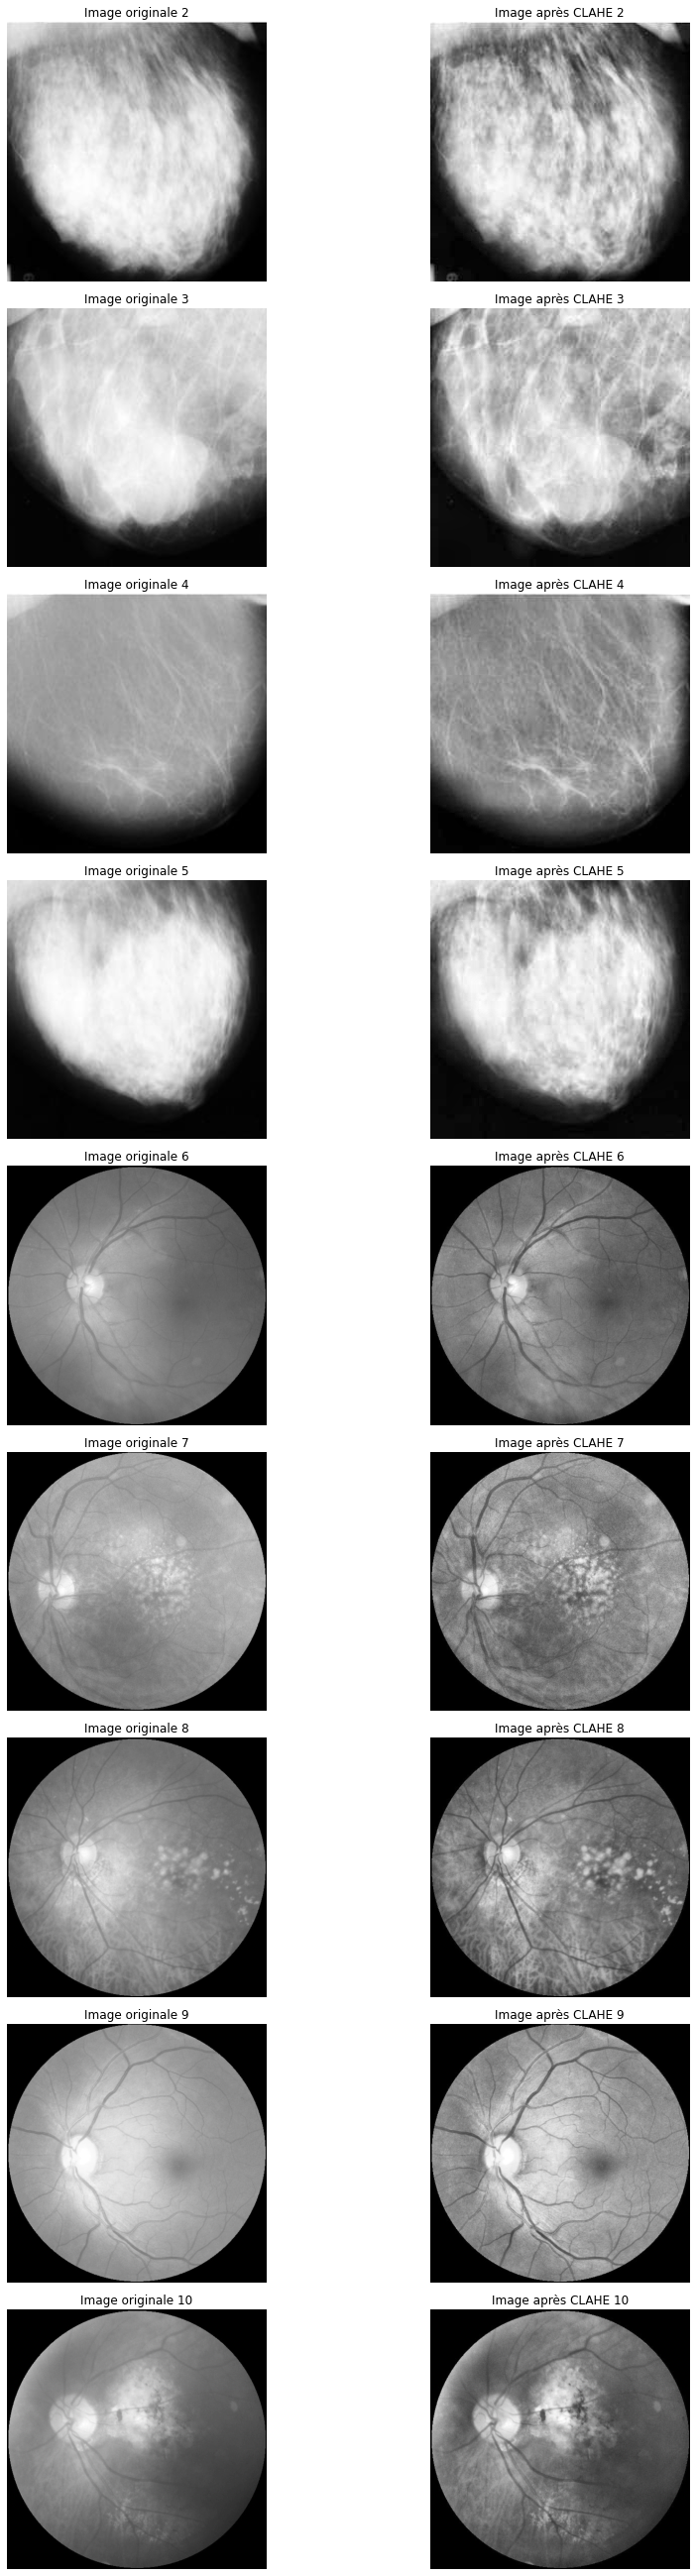

In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


directory_path = 'E:/RT4/S2/Traitement dimage/TP2'
image_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

plt.figure(figsize=(12, len(image_files) * 4))

for i, image_file in enumerate(image_files, start=1):
    img_path = os.path.join(directory_path, image_file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Impossible de charger l'image : {image_file}")
        continue
    
    equalized_image = apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8))
    
    plt.subplot(len(image_files), 2, 2*i-1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Image originale {i}')
    plt.axis('off')
    
    # Afficher l'image après l'application de CLAHE
    plt.subplot(len(image_files), 2, 2*i)
    plt.imshow(equalized_image, cmap='gray')
    plt.title(f'Image après CLAHE {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 7. Quantitative analysis

- Fonction pour calculer le PSNR

In [47]:
def calculate_psnr(original_image, compared_image):
    mse = mean_squared_error(original_image.flatten(), compared_image.flatten())
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

- Fonction pour calculer l'écart type SD

In [48]:
def calculate_sd(image):
    n = image.size
    X = np.mean(image)
    variance = np.sum((image - X)**2) / (n - 1)
    sd = np.sqrt(variance)
    return sd

In [49]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


directory_path = 'E:/RT4/S2/Traitement dimage/TP2'
image_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# Initialisation des DataFrames pour PSNR, MSE, et SD
psnr_df = pd.DataFrame(columns=['HE', 'CHE', 'QDHE', 'CLAHE'])
mse_df = pd.DataFrame(columns=['HE', 'CHE', 'QDHE', 'CLAHE'])
sd_df = pd.DataFrame(columns=['HE', 'CHE', 'QDHE', 'CLAHE'])

# Définir les paramètres pour CHE et CLAHE
clip_limit = 2.0
tile_grid_size = (8, 8)

for image_name in image_files: 
    image_path = os.path.join(directory_path, image_name)
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if original_image is not None:
        # Appliquer chaque algorithme à l'image originale
        he_image = cv2.equalizeHist(original_image)
        che_image = cumulative_histogram_equalization(original_image)  
        qdhe_image = qdhe(original_image)  
        clahe_image = apply_clahe(original_image, clip_limit, tile_grid_size)  
        
        # Calculer PSNR pour chaque algorithme
        psnr_values = {
            'HE': calculate_psnr(original_image, he_image),
            'CHE': calculate_psnr(original_image, che_image),
            'QDHE': calculate_psnr(original_image, qdhe_image),
            'CLAHE': calculate_psnr(original_image, clahe_image)
        }
        
        # Calculer MSE pour chaque algorithme
        mse_values = {
            'HE': mean_squared_error(original_image.flatten(), he_image.flatten()),
            'CHE': mean_squared_error(original_image.flatten(), che_image.flatten()),
            'QDHE': mean_squared_error(original_image.flatten(), qdhe_image.flatten()),
            'CLAHE': mean_squared_error(original_image.flatten(), clahe_image.flatten())
        }
        
        # Calculer SD pour chaque algorithme
        sd_values = {
            'HE': calculate_sd(he_image),
            'CHE': calculate_sd(che_image),
            'QDHE': calculate_sd(qdhe_image),
            'CLAHE': calculate_sd(clahe_image)
        }
        
        # Ajouter les résultats aux DataFrames correspondants
        psnr_df.loc[image_name] = psnr_values
        mse_df.loc[image_name] = mse_values
        sd_df.loc[image_name] = sd_values
    else:
        print("Failed to load image:", image_path)

# Affichage des DataFrames avec les résultats
print("PSNR pour chaque image et chaque algorithme :")
print(psnr_df)
print("\nMSE pour chaque image et chaque algorithme :")
print(mse_df)
print("\nSD pour chaque image et chaque algorithme :")
print(sd_df)


Failed to load image: E:/RT4/S2/Traitement dimage/TP2\equalization.txt
Failed to load image: E:/RT4/S2/Traitement dimage/TP2\qhe.txt
PSNR pour chaque image et chaque algorithme :
                    HE        CHE       QDHE      CLAHE
image_1.jpg  28.064960  27.944691  30.420609  29.119205
image_2.jpg  27.878550  27.813191  28.452935  29.365193
image_3.jpg  28.539523  28.483796  29.026615  29.303559
image_4.jpg  28.393626  28.160762  29.871967  30.069637
image_5.jpg  28.599683  28.984205  29.534495  30.159284
image_6.jpg  28.880196  29.083529  29.804396  30.540675
image_7.jpg  29.667312  28.981598  29.553854  30.220305
image_8.jpg  29.705784  29.070037  28.586354  30.521173
image_9.jpg  28.820938  28.727730  29.902050  29.874397

MSE pour chaque image et chaque algorithme :
                     HE         CHE       QDHE      CLAHE
image_1.jpg  101.527664  104.378555  59.022751  79.645248
image_2.jpg  105.980362  107.587357  92.851059  75.259460
image_3.jpg   91.018158   92.193588  81.3

# 8. Interprétation des résultats :

#### PSNR (Peak Signal to Noise Ratio) :
Le PSNR est une mesure de la qualité d'une image reconstruite par rapport à son original. Plus la valeur du PSNR est élevée, meilleure est la qualité. D'après les résultats, on observe que les techniques QDHE et CLAHE tendent à offrir des valeurs de PSNR plus élevées par rapport à HE et CHE, ce qui suggère une meilleure qualité d'image après l'amélioration, particulièrement pour QDHE et CLAHE.
#### MSE (Mean Square Error) :
Le MSE mesure l'erreur moyenne au carré entre l'image originale et l'image améliorée. Une valeur MSE plus basse indique une erreur plus faible et donc une qualité d'image améliorée plus proche de l'original. Les résultats montrent que QDHE et CLAHE ont tendance à avoir des valeurs MSE plus basses dans la plupart des cas, indiquant une meilleure performance en termes de fidélité à l'image originale.

#### SD (Standard Deviation) :
L'écart type mesure la variation ou la dispersion des valeurs d'intensité des pixels de l'image par rapport à la moyenne. Une SD élevée dans le contexte de l'amélioration de l'image peut indiquer un contraste accru. Les techniques d'amélioration varient dans leurs effets sur la SD, avec QDHE et parfois CLAHE montrant une augmentation significative, ce qui peut être interprété comme une amélioration du contraste dans ces cas.

# 9. Conclusion :

Les techniques QDHE et CLAHE offrent une meilleure amélioration des images médicales en termes de PSNR et de MSE par rapport à HE et CHE, indiquant une qualité d'image supérieure et une fidélité plus élevée à l'image originale. <br> En ce qui concerne la SD, les résultats varient, mais une SD plus élevée observée avec QDHE et CLAHE peut indiquer une amélioration du contraste, un aspect crucial pour l'analyse d'images médicales.  <br> Ces observations suggèrent que pour l'amélioration du contraste et la clarté des détails dans les images médicales, QDHE et CLAHE pourraient être des choix plus performants.